*****
This notebook in particular uses the dataset with new features added.  

Specifically it includes hero synergy values, calculated as shown in features.ipynb
*****

After creating more features and adding them to the hero dataset, I am going to re-run models that I already ran in the first models.ipynb notebook, as well as maybe test out some other models too.   

Since I have added in as many features that I think were feasible with the current data that I have and is available, I will see if adjusting which features are used affects model performance also. 



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

hero_data = pd.read_csv("final_hero_dataset.csv")

hero_data.head()

,player_id,hero_name,role,timePlayed_value,matchesWinPct_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,...,Squirrel Girl,Star-Lord,Storm,The Punisher,The Thing,Thor,Ultron,Venom,Winter Soldier,Wolverine
0,VP Sypeh,Gambit,strategist,10.385762,0.691358,48.6,4.075556,9.626667,881.0,2983.0,...,0.5,0.5,1.0,0.5,0.5,0.0,0.5,1.0,0.500000,0.750000
1,VP Sypeh,Invisible Woman,strategist,4.102634,0.639344,18.3,4.962500,11.475000,1294.0,3169.0,...,0.5,1.0,0.5,0.5,0.5,1.0,0.5,0.0,0.666667,0.666667
2,VP Sypeh,Emma Frost,vanguard,0.354180,0.714286,1.4,3.363636,4.545455,2404.0,0.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.500000,0.500000
3,VP Sypeh,Loki,strategist,1.963736,0.932203,11.8,5.400000,13.400000,957.0,2267.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.500000,0.500000
4,VP Sypeh,Adam Warlock,strategist,0.615783,0.533333,3.0,2.750000,4.850000,1272.0,1596.0,...,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.500000,0.500000


Re-Using model code from models.ipynb

In [2]:
#i cant just label it 1,2,3, because then the model might try to compare them numerically, 
#i need to make it so it chooses one value or another
#like if the role is duelist, then strategist and vanguard are both 0 and it will get rid of their variables 
def onehot_encode_roles(df):
    if df['role'] == 'strategist': 
        return pd.Series([1,0,0])
    elif df['role'] == 'duelist':
        return pd.Series([0,1,0])
    elif df['role'] == 'vanguard':
        return pd.Series([0,0,1])

hero_data[['role_strategist', 'role_duelist', 'role_vanguard']] = hero_data.apply(onehot_encode_roles, axis=1)
hero_data 


,player_id,hero_name,role,timePlayed_value,matchesWinPct_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,...,The Punisher,The Thing,Thor,Ultron,Venom,Winter Soldier,Wolverine,role_strategist,role_duelist,role_vanguard
0,VP Sypeh,Gambit,strategist,10.385762,0.691358,48.6,4.075556,9.626667,881.0,2983.0,...,0.5,0.5,0.0,0.5,1.0,0.500000,0.750000,1,0,0
1,VP Sypeh,Invisible Woman,strategist,4.102634,0.639344,18.3,4.962500,11.475000,1294.0,3169.0,...,0.5,0.5,1.0,0.5,0.0,0.666667,0.666667,1,0,0
2,VP Sypeh,Emma Frost,vanguard,0.354180,0.714286,1.4,3.363636,4.545455,2404.0,0.0,...,0.5,0.5,0.5,0.5,0.5,0.500000,0.500000,0,0,1
3,VP Sypeh,Loki,strategist,1.963736,0.932203,11.8,5.400000,13.400000,957.0,2267.0,...,0.5,0.5,0.5,0.5,0.5,0.500000,0.500000,1,0,0
4,VP Sypeh,Adam Warlock,strategist,0.615783,0.533333,3.0,2.750000,4.850000,1272.0,1596.0,...,0.5,0.5,0.5,0.5,0.5,0.500000,0.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,DecaDonald,Loki,strategist,10.502265,0.572016,48.6,2.886207,7.500000,701.0,2287.0,...,0.5,0.5,0.0,0.5,0.5,0.333333,0.000000,1,0,0
3953,DecaDonald,Invisible Woman,strategist,2.657516,0.336283,11.3,2.098901,5.571429,677.0,2592.0,...,0.5,0.5,0.5,0.5,0.5,0.000000,0.500000,1,0,0
3954,DecaDonald,Rocket Raccoon,strategist,3.638904,0.590674,19.3,1.400000,6.410526,207.0,1988.0,...,0.0,0.0,0.5,0.5,1.0,0.000000,0.500000,1,0,0
3955,DecaDonald,Venom,vanguard,0.448317,0.400000,2.5,2.117647,2.941176,1095.0,0.0,...,0.5,0.5,0.5,0.5,0.5,0.500000,1.000000,0,0,1


In [3]:
from sklearn.model_selection import train_test_split
features = features = hero_data.columns.drop(['player_id', 'hero_name', 'role', 'matchesWinPct_value'])
X = hero_data[features]
y = hero_data['matchesWinPct_value']
#splitting to 90/10 train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler() #need to separate scalars to keep the x and y separate, in a sense making 2 scaler objects that can act on our data 
scaler_Y = MinMaxScaler()

X_scaled_values = scaler_X.fit_transform(X_train)

#problems with y not being able to be reshaped since its a series object not a df 
#Y_scaled_values = scaler_Y.fit_transform(y_train.values.reshape(-1,1)) #need to reshape the array to be 2-d in order for the function to work to make a numpy array

x_train_scaled_vals = X_scaled_values
#i shouldnt scale the y train values bc its a single output value
#y_train_scaled_vals = Y_scaled_values
y_train_scaled_vals = y_train

In [5]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
result = lm.fit(x_train_scaled_vals,y_train_scaled_vals)
print(result.intercept_)
print(result.coef_)

0.03976002164264625
[-4.68286912e-01  3.00626699e-01  1.20293851e+00  7.05000971e-01
 -1.49536051e-01 -1.97266511e-01  4.54520012e-02  2.49647262e-01
  4.03256327e-01 -6.71345490e-01  1.72677641e-01  3.22277099e-04
  9.95380180e-03  1.89888394e-02  1.09753363e-02  1.23252922e-02
  1.53197350e-02  1.48455939e-02 -8.25421019e-04  2.05605883e-02
  1.04083409e-17  2.89708176e-03  8.75505713e-03  7.21395644e-03
 -2.46612288e-02 -1.72354817e-02 -1.20895289e-02 -3.34716081e-02
  3.88638352e-02 -4.77611266e-02  1.52108482e-02  4.14231905e-02
  1.32475671e-03 -5.31429329e-03  3.42480535e-02  2.00221745e-03
  2.21486973e-02  5.79493128e-02  5.39572138e-02  2.34672690e-02
 -1.28312515e-03  8.32107407e-03  1.11039773e-02  6.66245010e-02
 -6.88544931e-03  2.61288894e-02  3.58161911e-02  2.20047346e-02
 -1.56773264e-03 -2.02313556e-04  7.59600332e-02 -1.13775367e-02
  1.42389116e-02  3.51910424e-03 -1.50288062e-02  2.41361041e-02
  7.34359351e-03  9.09843719e-03  3.01706907e-02  6.94053187e-02
  1.0

In [6]:
X_test_all_cols = X_test.copy()
X_test_all_cols['player_id'] = hero_data.loc[X_test.index, 'player_id']
X_test_all_cols['hero_name'] = hero_data.loc[X_test.index, 'hero_name']
X_test_all_cols

,timePlayed_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,totalDamageTakenPerMinute_value,lastKills_value,totalMvp_value,totalSvp_value,...,Thor,Ultron,Venom,Winter Soldier,Wolverine,role_strategist,role_duelist,role_vanguard,player_id,hero_name
149,4.068457,20.8,5.688172,7.010753,2054.0,0.0,2872.0,180,3,0,...,0.5,0.5,0.5,1.0,0.5,0,0,1,Nеcrize,Emma Frost
1025,1.020680,5.5,5.194444,5.194444,2796.0,0.0,929.0,80,2,0,...,0.5,0.5,0.5,0.5,0.5,0,1,0,happyhamster6,Moon Knight
2153,3.353423,14.4,2.422222,7.055556,781.0,2227.0,489.0,33,2,0,...,0.5,0.5,0.5,0.5,0.5,1,0,0,Dinks,Loki
720,5.612147,29.8,3.639344,4.431694,2091.0,82.0,4686.0,232,4,2,...,0.5,0.5,0.0,1.0,1.0,0,0,1,Unovvn,Groot
325,0.555147,2.5,2.777778,3.277778,1595.0,0.0,2383.0,15,0,0,...,0.5,0.5,0.5,1.0,0.5,0,0,1,TreeMan.1,Magneto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,4.304796,23.3,3.777778,8.898148,991.0,2230.0,535.0,101,1,0,...,0.5,0.5,0.5,0.0,1.0,1,0,0,MilleDidrik,Jeff The Land Shark
3884,0.388022,1.7,3.500000,3.750000,1621.0,0.0,4298.0,15,0,0,...,0.5,0.5,0.5,0.5,1.0,0,0,1,斩尽杀绝,Groot
1345,0.253282,1.6,1.750000,2.312500,1334.0,0.0,1401.0,12,0,0,...,0.5,0.5,0.5,0.5,0.5,0,1,0,Evil GomaKazi,Daredevil
69,1.722180,9.5,7.392857,8.821429,2019.0,0.0,3019.0,78,0,0,...,0.5,0.5,0.5,0.5,1.0,0,0,1,energу,Magneto


In [7]:
x_Test_scaled = scaler_X.transform(X_test)

In [8]:
scaled_prediction_sk = lm.predict(x_Test_scaled)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, scaled_prediction_sk)
r2 = r2_score(y_test, scaled_prediction_sk)

print(mse)
print(mse**0.5)
print(r2)


0.029263646821315586
0.17106620595931735
0.38723046741709233


*****
Creating Visualizations for each model, by plotting y pred and y actual
*****

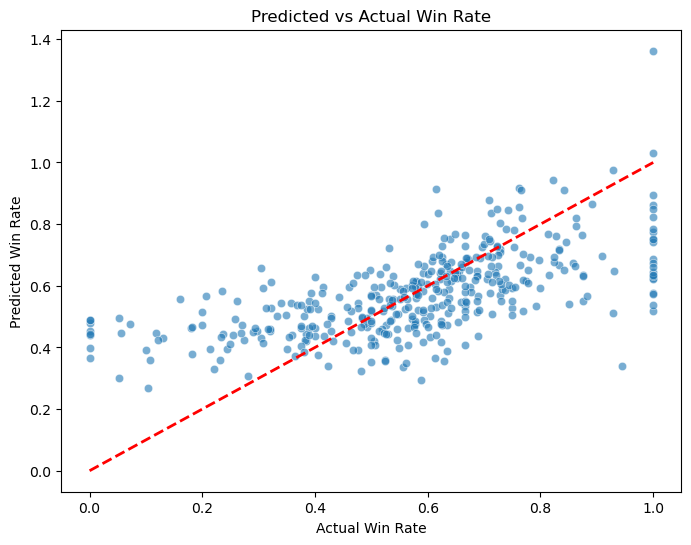

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=scaled_prediction_sk, alpha=0.6)

#reference line 
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Win Rate")
plt.ylabel("Predicted Win Rate")
plt.title("Predicted vs Actual Win Rate")
plt.show()


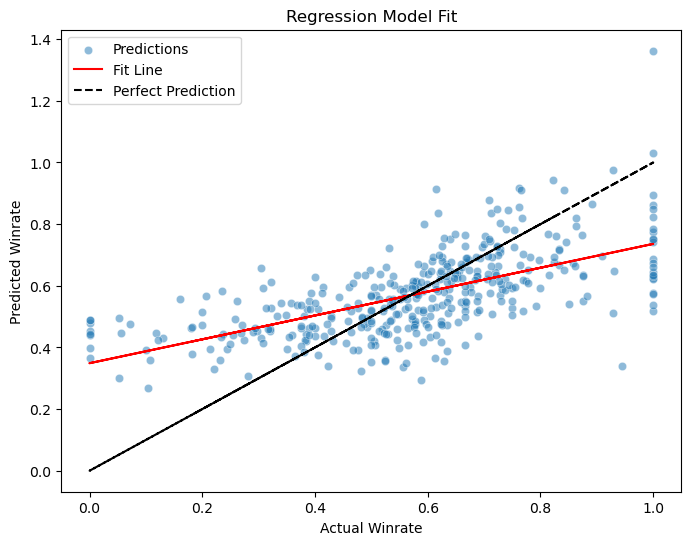

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=scaled_prediction_sk, alpha=0.5, label="Predictions")

# Best-fit regression line
m, b = np.polyfit(y_test, scaled_prediction_sk, 1)
plt.plot(y_test, m*y_test + b, color='red', label="Fit Line")

# Perfect prediction line
plt.plot(y_test, y_test, 'k--', label="Perfect Prediction")

plt.xlabel("Actual Winrate")
plt.ylabel("Predicted Winrate")
plt.title("Regression Model Fit")
plt.legend()
plt.show()


So since the model has 76 features, I am having trouble plotting a 76 dimension polynomial. So I am drawing the fit line based on the predictions instead. 

In [12]:
prediction_results = X_test.copy()
prediction_results['Predicted Win %'] = scaled_prediction_sk.flatten()
prediction_results['Actual Win %'] = y_test.values.flatten()

prediction_results.head()

,timePlayed_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,totalDamageTakenPerMinute_value,lastKills_value,totalMvp_value,totalSvp_value,...,Thor,Ultron,Venom,Winter Soldier,Wolverine,role_strategist,role_duelist,role_vanguard,Predicted Win %,Actual Win %
149,4.068457,20.8,5.688172,7.010753,2054.0,0.0,2872.0,180,3,0,...,0.5,0.5,0.5,1.0,0.5,0,0,1,0.762203,0.826923
1025,1.020680,5.5,5.194444,5.194444,2796.0,0.0,929.0,80,2,0,...,0.5,0.5,0.5,0.5,0.5,0,1,0,0.720548,0.727273
2153,3.353423,14.4,2.422222,7.055556,781.0,2227.0,489.0,33,2,0,...,0.5,0.5,0.5,0.5,0.5,1,0,0,0.669797,0.631944
720,5.612147,29.8,3.639344,4.431694,2091.0,82.0,4686.0,232,4,2,...,0.5,0.5,0.0,1.0,1.0,0,0,1,0.709966,0.728188
325,0.555147,2.5,2.777778,3.277778,1595.0,0.0,2383.0,15,0,0,...,0.5,0.5,0.5,1.0,0.5,0,0,1,0.623857,1.000000


In [13]:
prediction_results_with_ids = X_test_all_cols.copy()
prediction_results_with_ids['Predicted Win %'] = scaled_prediction_sk.flatten()
prediction_results_with_ids['Actual Win %'] = y_test.values.flatten()
prediction_results_with_ids

,timePlayed_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,totalDamageTakenPerMinute_value,lastKills_value,totalMvp_value,totalSvp_value,...,Venom,Winter Soldier,Wolverine,role_strategist,role_duelist,role_vanguard,player_id,hero_name,Predicted Win %,Actual Win %
149,4.068457,20.8,5.688172,7.010753,2054.0,0.0,2872.0,180,3,0,...,0.5,1.0,0.5,0,0,1,Nеcrize,Emma Frost,0.762203,0.826923
1025,1.020680,5.5,5.194444,5.194444,2796.0,0.0,929.0,80,2,0,...,0.5,0.5,0.5,0,1,0,happyhamster6,Moon Knight,0.720548,0.727273
2153,3.353423,14.4,2.422222,7.055556,781.0,2227.0,489.0,33,2,0,...,0.5,0.5,0.5,1,0,0,Dinks,Loki,0.669797,0.631944
720,5.612147,29.8,3.639344,4.431694,2091.0,82.0,4686.0,232,4,2,...,0.0,1.0,1.0,0,0,1,Unovvn,Groot,0.709966,0.728188
325,0.555147,2.5,2.777778,3.277778,1595.0,0.0,2383.0,15,0,0,...,0.5,1.0,0.5,0,0,1,TreeMan.1,Magneto,0.623857,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,4.304796,23.3,3.777778,8.898148,991.0,2230.0,535.0,101,1,0,...,0.5,0.0,1.0,1,0,0,MilleDidrik,Jeff The Land Shark,0.588766,0.613734
3884,0.388022,1.7,3.500000,3.750000,1621.0,0.0,4298.0,15,0,0,...,0.5,0.5,1.0,0,0,1,斩尽杀绝,Groot,0.693561,0.823529
1345,0.253282,1.6,1.750000,2.312500,1334.0,0.0,1401.0,12,0,0,...,0.5,0.5,0.5,0,1,0,Evil GomaKazi,Daredevil,0.468480,0.375000
69,1.722180,9.5,7.392857,8.821429,2019.0,0.0,3019.0,78,0,0,...,0.5,0.5,1.0,0,0,1,energу,Magneto,0.794425,0.863158


*****
I want to test naive bayes. I want to see if I can classify data into not likely, likely, highly likely to win a match
*****

In [14]:
#need to split up the data and classify it based on win percentage ranges 
def classify_win_percentage(win_pct):
    if win_pct < 40:
        return 'Low likelihood'
    elif 40 <= win_pct < 60:
        return 'Medium likelihood'
    else:
        return 'High likelihood'

In [15]:
naive_bayes_heroes_df = hero_data.copy()
naive_bayes_heroes_df['Win_Likelihood'] = naive_bayes_heroes_df['matchesWinPct_value'].apply(classify_win_percentage)
naive_bayes_heroes_df

,player_id,hero_name,role,timePlayed_value,matchesWinPct_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,...,The Thing,Thor,Ultron,Venom,Winter Soldier,Wolverine,role_strategist,role_duelist,role_vanguard,Win_Likelihood
0,VP Sypeh,Gambit,strategist,10.385762,0.691358,48.6,4.075556,9.626667,881.0,2983.0,...,0.5,0.0,0.5,1.0,0.500000,0.750000,1,0,0,Low likelihood
1,VP Sypeh,Invisible Woman,strategist,4.102634,0.639344,18.3,4.962500,11.475000,1294.0,3169.0,...,0.5,1.0,0.5,0.0,0.666667,0.666667,1,0,0,Low likelihood
2,VP Sypeh,Emma Frost,vanguard,0.354180,0.714286,1.4,3.363636,4.545455,2404.0,0.0,...,0.5,0.5,0.5,0.5,0.500000,0.500000,0,0,1,Low likelihood
3,VP Sypeh,Loki,strategist,1.963736,0.932203,11.8,5.400000,13.400000,957.0,2267.0,...,0.5,0.5,0.5,0.5,0.500000,0.500000,1,0,0,Low likelihood
4,VP Sypeh,Adam Warlock,strategist,0.615783,0.533333,3.0,2.750000,4.850000,1272.0,1596.0,...,0.5,0.5,0.5,0.5,0.500000,0.500000,1,0,0,Low likelihood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,DecaDonald,Loki,strategist,10.502265,0.572016,48.6,2.886207,7.500000,701.0,2287.0,...,0.5,0.0,0.5,0.5,0.333333,0.000000,1,0,0,Low likelihood
3953,DecaDonald,Invisible Woman,strategist,2.657516,0.336283,11.3,2.098901,5.571429,677.0,2592.0,...,0.5,0.5,0.5,0.5,0.000000,0.500000,1,0,0,Low likelihood
3954,DecaDonald,Rocket Raccoon,strategist,3.638904,0.590674,19.3,1.400000,6.410526,207.0,1988.0,...,0.0,0.5,0.5,1.0,0.000000,0.500000,1,0,0,Low likelihood
3955,DecaDonald,Venom,vanguard,0.448317,0.400000,2.5,2.117647,2.941176,1095.0,0.0,...,0.5,0.5,0.5,0.5,0.500000,1.000000,0,0,1,Low likelihood


In [16]:
#setting the y value for naive bayes
y = naive_bayes_heroes_df['Win_Likelihood']

from sklearn.naive_bayes import GaussianNB #guassian nb is navie bayes on sklearn
gnb = GaussianNB()

#have scaled variables already but re making them in case using the scalers and x train and x test we already have 
X_GNB_train_scaled = scaler_X.transform(X_train)
X_GNB_test_scaled = scaler_X.transform(X_test)

#setting up the y values for naive bayes classification using the y_train and y_test series that are already made 
y_train_GNB = y_train.apply(classify_win_percentage)
y_test_GNB = y_test.apply(classify_win_percentage)

gnb.fit(X_GNB_train_scaled, y_train_GNB)
gnb_predictions = gnb.predict(X_GNB_test_scaled)

In [17]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test_GNB != gnb_predictions).sum()))

Number of mislabeled points out of a total 396 points : 0


In [18]:
from sklearn.metrics import zero_one_loss
print(zero_one_loss(y_test_GNB, gnb_predictions))


0.0


PLOT

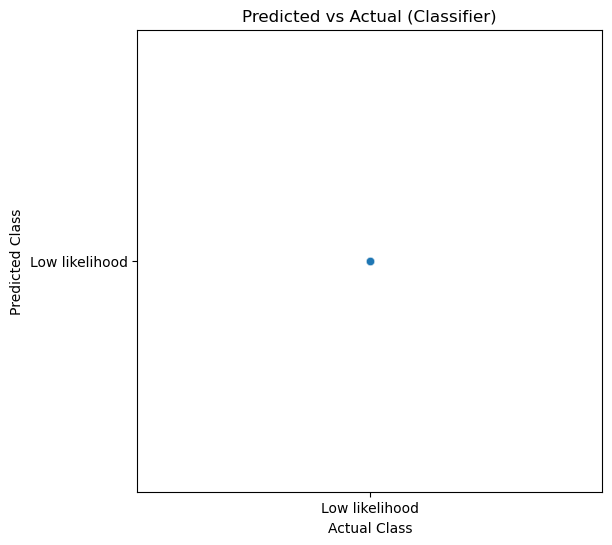

In [19]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_GNB, y=gnb_predictions, alpha=0.6)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.title("Predicted vs Actual (Classifier)")
plt.show()


100% accuracy??? Surprising...

*****
Next, I want to try out the models in the Ensembles section of scikit learn docs. Here they talk about how ensemble methods combine the predictions of several base estimators using a given learning algorithm, and it improves generalizability.   

In addition, histogram gradient boosting classifier algorithm can handle categorical data natively, which means I can leave in categorical data and not have to mess with the dataset to prepare it for the model. 


https://scikit-learn.org/stable/modules/ensemble.html
*****

Histogram Based Gradient Boosting: Requires classifications (categorical) so I will have to use the same data format as the naive bayes one for this specifically

In [20]:
#need to split up the data and classify it based on win percentage ranges 
def classify_more_specific_win_percentage(win_pct):
    if win_pct < 40:
        return 'not likely'
    elif 40 <= win_pct < 60:
        return 'even likelihood'
    elif 60 <= win_pct < 70:
        return 'likely'
    else:
        return 'very likely'

In [21]:
histogram_heroes_df = hero_data.copy()
histogram_heroes_df['Win_Likelihood'] = histogram_heroes_df['matchesWinPct_value'].apply(classify_more_specific_win_percentage)
histogram_heroes_df

,player_id,hero_name,role,timePlayed_value,matchesWinPct_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,...,The Thing,Thor,Ultron,Venom,Winter Soldier,Wolverine,role_strategist,role_duelist,role_vanguard,Win_Likelihood
0,VP Sypeh,Gambit,strategist,10.385762,0.691358,48.6,4.075556,9.626667,881.0,2983.0,...,0.5,0.0,0.5,1.0,0.500000,0.750000,1,0,0,not likely
1,VP Sypeh,Invisible Woman,strategist,4.102634,0.639344,18.3,4.962500,11.475000,1294.0,3169.0,...,0.5,1.0,0.5,0.0,0.666667,0.666667,1,0,0,not likely
2,VP Sypeh,Emma Frost,vanguard,0.354180,0.714286,1.4,3.363636,4.545455,2404.0,0.0,...,0.5,0.5,0.5,0.5,0.500000,0.500000,0,0,1,not likely
3,VP Sypeh,Loki,strategist,1.963736,0.932203,11.8,5.400000,13.400000,957.0,2267.0,...,0.5,0.5,0.5,0.5,0.500000,0.500000,1,0,0,not likely
4,VP Sypeh,Adam Warlock,strategist,0.615783,0.533333,3.0,2.750000,4.850000,1272.0,1596.0,...,0.5,0.5,0.5,0.5,0.500000,0.500000,1,0,0,not likely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,DecaDonald,Loki,strategist,10.502265,0.572016,48.6,2.886207,7.500000,701.0,2287.0,...,0.5,0.0,0.5,0.5,0.333333,0.000000,1,0,0,not likely
3953,DecaDonald,Invisible Woman,strategist,2.657516,0.336283,11.3,2.098901,5.571429,677.0,2592.0,...,0.5,0.5,0.5,0.5,0.000000,0.500000,1,0,0,not likely
3954,DecaDonald,Rocket Raccoon,strategist,3.638904,0.590674,19.3,1.400000,6.410526,207.0,1988.0,...,0.0,0.5,0.5,1.0,0.000000,0.500000,1,0,0,not likely
3955,DecaDonald,Venom,vanguard,0.448317,0.400000,2.5,2.117647,2.941176,1095.0,0.0,...,0.5,0.5,0.5,0.5,0.500000,1.000000,0,0,1,not likely


In [22]:
#set the y train and y test for histogram based classification
y_train_hist = y_train.apply(classify_more_specific_win_percentage)
y_test_hist = y_test.apply(classify_more_specific_win_percentage)

In [23]:
from sklearn.ensemble import HistGradientBoostingClassifier
#.ravel() is used to convert y_train from a 2D array to a 1D array, necessary a lot in ML libraries

#for this i dont need to scale the data, the algorithm works without it
clf = HistGradientBoostingClassifier(max_iter=300).fit(X_train, y_train_hist)
clf_prediction = clf.predict(X_test)

clf.score(X_test, y_test_hist)


1.0

In [24]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(max_iter=100).fit(X_train, y_train)
hgb_prediction = hgb.predict(X_test)
print(hgb.score(X_test, y_test))

0.4359454757255038


In [25]:
from sklearn.metrics import mean_squared_error
mse_hgb = mean_squared_error(y_test, hgb_prediction)
rmse_hgb = mse_hgb**0.5
print(mse_hgb)
print(rmse_hgb)

0.02693719499525009
0.16412554644311192


PLOT

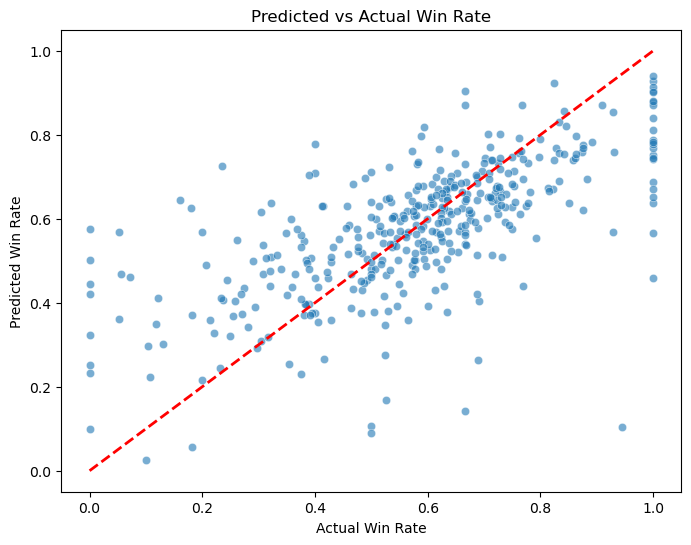

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=hgb_prediction, alpha=0.6)

#reference line 
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Win Rate")
plt.ylabel("Predicted Win Rate")
plt.title("Predicted vs Actual Win Rate")
plt.show()


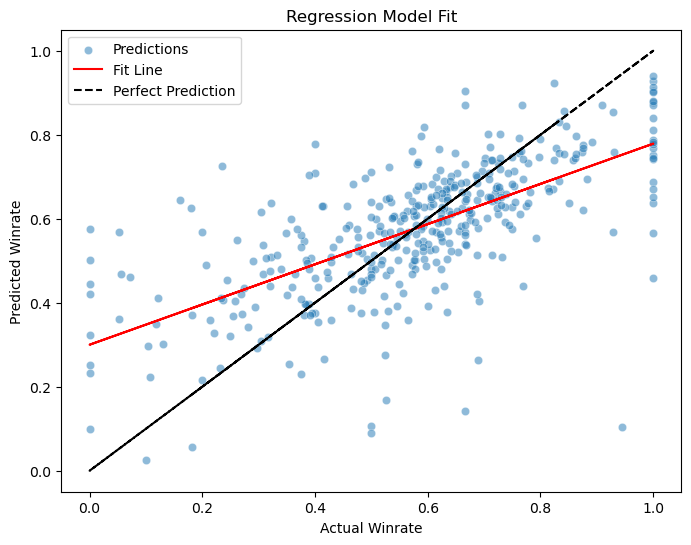

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=hgb_prediction, alpha=0.5, label="Predictions")

# Best-fit regression line
m, b = np.polyfit(y_test, hgb_prediction, 1)
plt.plot(y_test, m*y_test + b, color='red', label="Fit Line")

# Perfect prediction line
plt.plot(y_test, y_test, 'k--', label="Perfect Prediction")

plt.xlabel("Actual Winrate")
plt.ylabel("Predicted Winrate")
plt.title("Regression Model Fit")
plt.legend()
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=None)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
print(rfc.score(X_test, y_test))

0.4342285388498889


In [29]:
mse_rfc = mean_squared_error(y_test, hgb_prediction)
rmse_rfc = mse_rfc**0.5
print(mse_rfc)
print(rmse_rfc)

0.02693719499525009
0.16412554644311192


PLOT

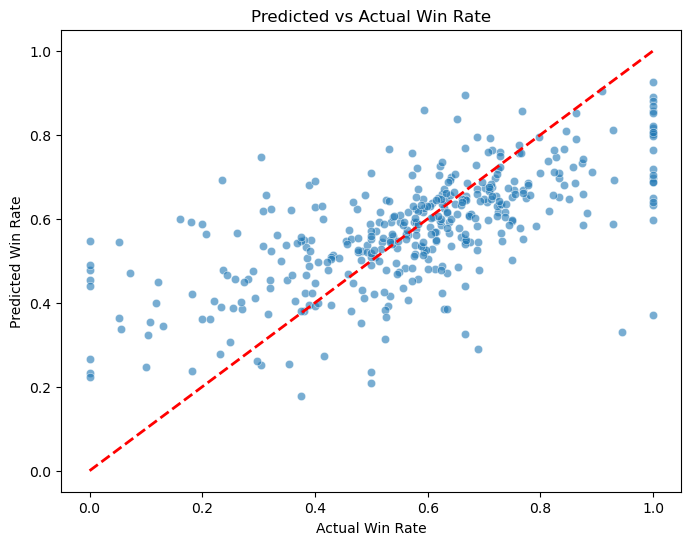

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rfc_prediction, alpha=0.6)

#reference line 
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Win Rate")
plt.ylabel("Predicted Win Rate")
plt.title("Predicted vs Actual Win Rate")
plt.show()


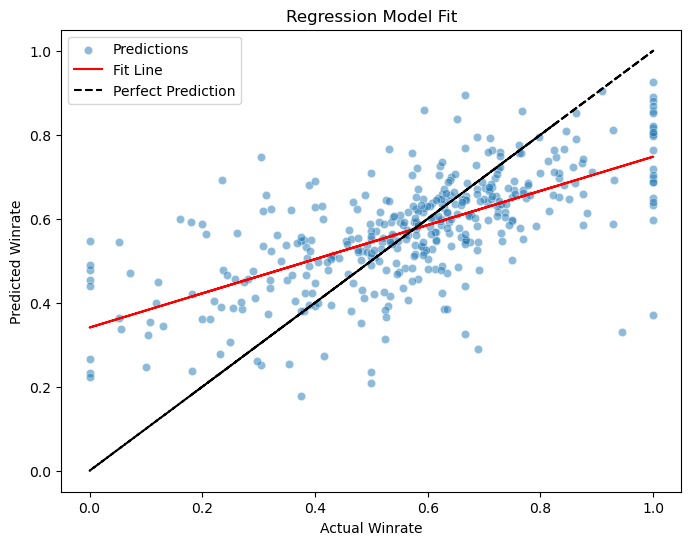

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=rfc_prediction, alpha=0.5, label="Predictions")

# Best-fit regression line
m, b = np.polyfit(y_test, rfc_prediction, 1)
plt.plot(y_test, m*y_test + b, color='red', label="Fit Line")

# Perfect prediction line
plt.plot(y_test, y_test, 'k--', label="Perfect Prediction")

plt.xlabel("Actual Winrate")
plt.ylabel("Predicted Winrate")
plt.title("Regression Model Fit")
plt.legend()
plt.show()
